<a href="https://colab.research.google.com/github/Jakhongir0103/ML_learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1)

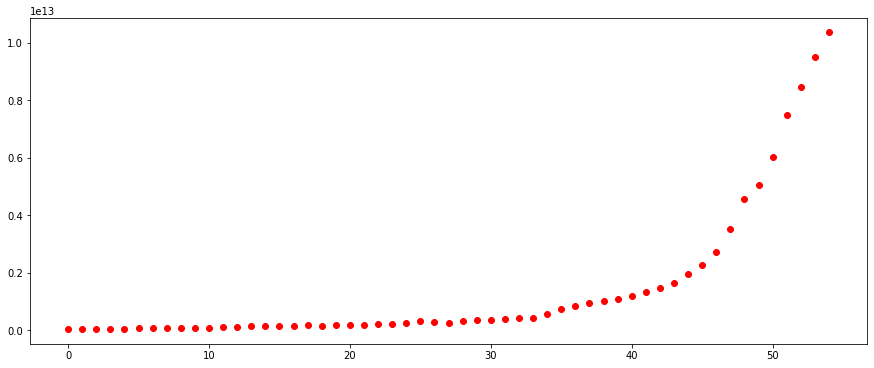

In [6]:
plt.figure(figsize=(15,6))
plt.plot(df['Value'], 'ro')
plt.show()

In [48]:
x_train = np.asanyarray(train[['Year']]) / df.Year.max()
y_train = np.asanyarray(train[['Value']]) / df.Value.min()

x_test = np.asanyarray(test[['Year']]) / df.Year.max()
y_test = np.asanyarray(test[['Value']]) / df.Value.min()

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
    ("model", LinearRegression())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('model', LinearRegression())])

In [92]:
y_train_predicted = pipeline.predict(x_train)

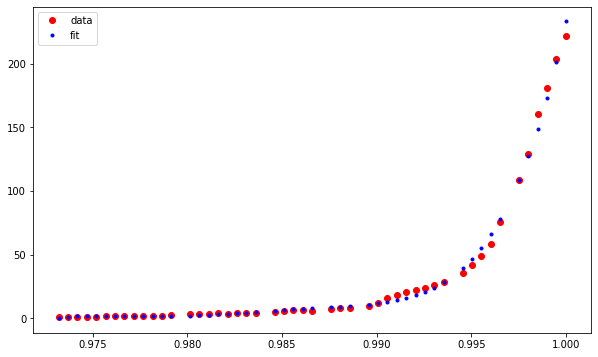

In [93]:
plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, 'ro', label='data')
plt.plot(x_train, y_train_predicted, 'b.', label='fit', )
plt.legend(loc='best')
plt.show()

In [94]:
y_test_predicted = pipeline.predict(x_test)

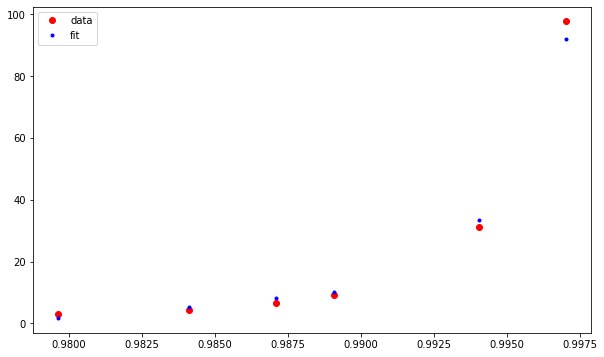

In [95]:
plt.figure(figsize=(10,6))
plt.plot(x_test, y_test, 'ro', label='data')
plt.plot(x_test, y_test_predicted, 'b.', label='fit', )
plt.legend(loc='best')
plt.show()

###### Evaluation

In [97]:
from sklearn.metrics import mean_absolute_error
mea = mean_absolute_error(y_train_predicted, y_train)
print(f'Train set MEA: {mea}')

Train set MEA: 2.1108442677716464


In [98]:
mea = mean_absolute_error(y_test_predicted, y_test)
print(f'Test set MEA: {mea}')

Test set MEA: 2.059945169138533
